# Exercise: Fundamentals of NumPy for DS


In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=1)

## Part 1 - Getting comfortable with reshape, vstack and hstack. 

### 1.1 Create a 8x8 matrix and fill it with a checkerboard pattern (1,0) using hstack and vstack.

For example,

```
[[0 1 0 1 0 1 0 1] 
 [1 0 1 0 1 0 1 0] 
 [0 1 0 1 0 1 0 1] 
 [1 0 1 0 1 0 1 0] 
 [0 1 0 1 0 1 0 1] 
 [1 0 1 0 1 0 1 0] 
 [0 1 0 1 0 1 0 1] 
 [1 0 1 0 1 0 1 0]]
```

In [2]:
### edTest(test_1) ###
## DO NOT REMOVE ABOVE LINE ##

# Initialize array of zeros - the dtype must be an 'int'
zeros_4x4 = np.zeros((4,4),dtype=int)

# Make even rows and odd columns as 1 using slicing
zeros_4x4[::2,1::2] = 1
# Make odd rows and even columns as 1 using slicing
zeros_4x4[1::2,::2] = 1

# Create an 8x4 array using vstack
zeros_8x4 = np.vstack((zeros_4x4, zeros_4x4))
# Create an 8x8 array using hstack
zeros_8x8 = np.hstack((zeros_8x4, zeros_8x4))

# Display the checkboard
print(zeros_8x8)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


### 1.2 Create a 3x3 matrix with values ranging from 0 to 8 using np.arange and np.reshape.

In [3]:
### edTest(test_2) ###
## DO NOT REMOVE ABOVE LINE ##

# Create a 1D array with np.arange and then reshape it to 3x3 matrix
Z = np.arange(0,9).reshape(3,3)

# Display the matrix
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### 1.3 Create a 5x5 array containing values from 0 to 24 using np.arange and np.reshape. Subsequently,swap the first two rows of this array using indexing.

In [4]:
### edTest(test_3) ###
## DO NOT REMOVE ABOVE LINE ##

# Create a 1D array with np.arange and then reshape it to 5x5 matrix
A = np.arange(0,25).reshape(5,5)

# Swap first two rows using indexing
# HINT: You can specify the index of the row within the list,
# For example, A[[0,1]] fetches the first two rows of an array.
A[[0, 1], :] = A[[1, 0], :]

# Display the swapped array
print(A)

[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


### 1.4 Reshape the following array <br>
```
np.array([[3, 4],
          [2, 4],
          [4, 1],
          [2, 2]])
```

into
```
np.array([[[3, 4]],

          [[2, 4]], 

          [[4, 1]], 
                         
          [[2, 2]]])
```


In [5]:
### edTest(test_4) ###
## DO NOT REMOVE ABOVE LINE ##

# Initialize the array
A = np.array([[3, 4],
              [2, 4],
              [4, 1],
              [2, 2]])

# Perform reshape
reshaped_array = np.reshape(A,(4,1,2))

# Display reshaped array
print(reshaped_array)

[[[3 4]]

 [[2 4]]

 [[4 1]]

 [[2 2]]]


## Part 2 - Getting comfortable with broadcasting

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works its way forward. Two dimensions are compatible when:
1. they are equal, or
2. one of them is 1


[Source](https://realpython.com/numpy-array-programming/)


Let us understand Broadcasting through a step-by-step example.

### 2.1 Subtract column-wise mean of an array from each of the elements i.e perform element wise subtraction.

In [6]:
# Initializing array
array_a = np.arange(6).reshape((3, 2))

# Display array
array_a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
# Calculate mean column-wise by specifying the relevant axis number
mu = np.mean(array_a, axis=0)

print(mu)

[2. 3.]


In [8]:
### edTest(test_5) ###
## DO NOT REMOVE ABOVE LINE ##

# Display the shapes
print('array a:', array_a.shape, '| column wise means:', mu.shape)

# Subtract column-wise mean from each of the elements
results = array_a - mu

print(results)

array a: (3, 2) | column wise means: (2,)
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


The above is fairly straightforward due to compatiable shapes for broadcasting. The following image showcases how broadcasting has taken place.

![alt text](broad1.png)

### 2.2 Subtract row-wise mean of an array from each of the elements i.e perform element wise subtraction. <br><br> NOTE: This is not the same as subtracting column-wise means.

In [9]:
# Let's first see what happens when we perform element-wise subtraction the 
# usual way we do it

# Calculate the row-wise means by specifying the relevant axis number
row_wise_mu = np.mean(array_a, axis=1)

# Display row-wise means
print("Row-wise means are", row_wise_mu)

# Display the shapes
print('array a:', array_a.shape, '| row wise means:', row_wise_mu.shape)

try:
    # Subtract row-wise mean from each of the elements
    result = array_a - row_wise_mu
except Exception as e:
    print("Error!!!! "+str(e))

Row-wise means are [0.5 2.5 4.5]
array a: (3, 2) | row wise means: (3,)
Error!!!! operands could not be broadcast together with shapes (3,2) (3,) 


### ⏸ Why broadcasting was not possible in the above calculation?

```
A. Because the broadcasting shapes were incompatible - we need to reshape the array to (3,1) to make it compatible 
B. Because the sizes of the array were incompatible - we need to resize the array to (3,2) to make it compatible
C. Because the arrays are not type compatiable - we need to typcast the array elements to appropriate int64 type in order for broadcasting to occur
```




In [10]:
### edTest(test_mcq1) ###
## DO NOT REMOVE ABOVE LINE ##

answer = "A" # Enter your answer choice, For example: "A"

Proceed to fix this error by reshaping the original shape in order to make it broadcast compatible.

In [11]:
### edTest(test_6) ###
## DO NOT REMOVE ABOVE LINE ##

# Reshape mu to make it compatible to be broadcasted with array_a
reshaped_mu = np.reshape(row_wise_mu,(3,1))

# Subtract row-wise mean from correspoding row elements
results = array_a - reshaped_mu

print(results)

[[-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]]


Here is a digram explaining what happened above - take some time to understand what is happening and why it is happening.

![alt text](broa2.jpg)

## Part 3 - Calculate Euclidean Distances between points

Similar to what the Grand Book keeper did to calculate the closest star, you will be performing the same task using numpy to calculate distances between a set of 10 coordinate points of the form (x,y).

To find the distance between two point (x1,y1) and (x2,y2), please note the following formula (also known as Euclidean formula):

![alt text](https://www.onlinemath4all.com/images/pythagoreantheorem24.png)

In [12]:
np.random.seed(42)

# Intializing an array of points containing (x,y) coordinates. 
# You have been given 10 such points
space_points = np.random.randint(0,5,(10,2))

# Display space points
print(space_points)

[[3 4]
 [2 4]
 [4 1]
 [2 2]
 [2 4]
 [3 2]
 [4 1]
 [3 1]
 [3 4]
 [0 3]]


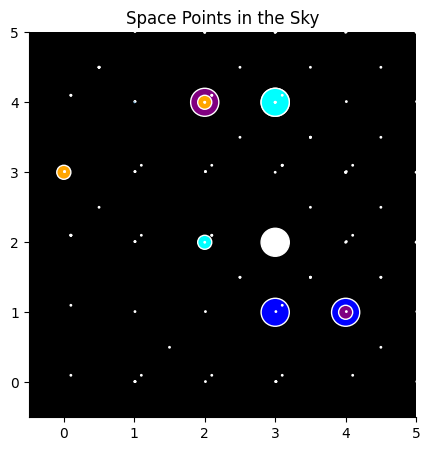

In [13]:
np.random.seed(2)

# Plotting the Space Points in Space - DO NOT WORRY if you cannot understand this code. 
colors = ['white', 'purple', 'blue','cyan','orange']
fig, ax = plt.subplots(figsize=(5,5))
for i,point in enumerate(space_points):
     circle = plt.Circle(point,np.random.choice([0.2,0.2,0.1]),edgecolor = 'k',facecolor = colors[i%5], ec='white')
     ax.add_patch(circle)
for i,point in enumerate(np.random.randint(0,7,(300,2))):
     circle = plt.Circle(point+np.random.choice([0.01, 0.1,2,0.5,5,10]),np.random.choice([0.01]),edgecolor = 'k',facecolor = 'white', ec='white')
     ax.add_patch(circle)
ax.scatter([1,2,3], [4,6,7] , s = 0.1)
ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('black')
ax.set_title("Space Points in the Sky");
fig.show()

### 3.1 Reshape your space points to look like this in order to perform broadcasting. Print the shape.

Hint: The original array was a `(10,2)`. In order to allow for broadcasting to be possible you need to reshape it to `(10,1,2)`.

```
array([[[3, 4]],

       [[2, 4]],

       [[4, 1]],

       [[2, 2]],

       [[2, 4]],

       [[3, 2]],

       [[4, 1]],

       [[3, 1]],

       [[3, 4]],

       [[0, 3]]])
```

In [14]:
### edTest(test_7) ###
## DO NOT REMOVE ABOVE LINE ##

# Reshape space_points
reshaped_space_points = np.reshape(space_points,(10,1,2))

# Display shape of reshaped_space_points
print(reshaped_space_points.shape)

(10, 1, 2)


### 3.2 Apply the Euclidean distance formula and store result in an array called results.

In [15]:
### edTest(test_8) ###
## DO NOT REMOVE ABOVE LINE ##

# Apply Euclidean distance formula and store the results

# STEP 1: Deltas - subract space points from reshaped_space_points
deltas = reshaped_space_points - space_points

# STEP 2: Square the deltas
squared_deltas = deltas**2

# STEP 3: Sum along the row elements i.e. Horizontal summation
squared_deltas_sum = np.sum(squared_deltas, axis=2)

# STEP 4: Calculate the square root of squared_deltas_sum
results = np.sqrt(squared_deltas_sum)


# Print the results
print(results)

[[0.  1.  3.2 2.2 1.  2.  3.2 3.  0.  3.2]
 [1.  0.  3.6 2.  0.  2.2 3.6 3.2 1.  2.2]
 [3.2 3.6 0.  2.2 3.6 1.4 0.  1.  3.2 4.5]
 [2.2 2.  2.2 0.  2.  1.  2.2 1.4 2.2 2.2]
 [1.  0.  3.6 2.  0.  2.2 3.6 3.2 1.  2.2]
 [2.  2.2 1.4 1.  2.2 0.  1.4 1.  2.  3.2]
 [3.2 3.6 0.  2.2 3.6 1.4 0.  1.  3.2 4.5]
 [3.  3.2 1.  1.4 3.2 1.  1.  0.  3.  3.6]
 [0.  1.  3.2 2.2 1.  2.  3.2 3.  0.  3.2]
 [3.2 2.2 4.5 2.2 2.2 3.2 4.5 3.6 3.2 0. ]]


### ⏸ Why are the diagonal values 0 in results?

```
A. They are the calculated distances from origin.
B. They are the distance calculated between the point and itself, therefore it is 0.
C. They are 0 because they are the points of identity matrix.
```

In [16]:
### edTest(test_9) ###
## DO NOT REMOVE ABOVE LINE ##

# Enter the correct option here - Example: 'A'
answer = 'B'